<a href="https://colab.research.google.com/github/soledadmon/Data-Science-I/blob/main/Entrega_1/ProyectoDSParteI_Montero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Primer entrega**
----  
**Abstract**

Para este proyecto se utilizo un dataset tomado de la realidad pero con datos modificados para no exponer información.
El estudio es sobre una empresa de transporte que tiene vehículos que trasladan personas, estos vehículos tienen viajes asignados. Pero a veces paralizan por distintos motivos, por ejemplo el vehículo se rompio y necesita ir al taller o el personal se durmio y llego tarde para realizar los viajes.
Estas paralizaciones pueden estar justificadas o no. Por ejemplo si el coche se rompe es una paralización justificada pero si es el personal es el que se duerme, la paralización no esta justificada.
Por lo que deseo realizar un estudio de cuanto es el tiempo que se pierde, cuantos viajes se dejan sin realizar, cual es el mayor motivo por el cual se estan realizando las paralizaciones. El objetivo es poder identificar problemas para buscarles la mejor solución y bajar los tiempos de paralizaciones a futuro.
Luego para la tarea final me gustaría tener un dataset con el total de horas asignadas por coche para evaluar sobre el total e incorporar un dataset con los coches que son a gasoil de los coches que son electricos para hacer un estudio teniendo en cuenta el cambio de la matriz energetica.
En el datasent que estoy utilizando para esta entrega se muetran las paralizaciones de los últimos 3 meses (junio, julio, agosto), y la informacion que brinda es: el coche que paralizo, desde que hora hasta que hora paralizo, el motivo por el cual paralizo, si concurrio a algún taller a que taller concurrio, si esta justificada la paralización, el perriodo (mes_anio a lque pertenece la paralizacion) y a que grupo de paralizaciones pertencese.
Para realizar un correcto anallizis de la información brindada por el dataset se realizará con una limpieza básica y una detección de valores faltantes, seguida de visualizaciones que permiten responder las preguntas principales para poder sacar concluciones. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.

----  

**Preguntas e hipótesis de interés**

Las preguntas en esta primer instancia serían:
- ¿Cuántas horas se pierden por mes?
- ¿Cuál es el motivo por el que se pierden horas?
- ¿Cuáles el coche que pierde mas horas por mes?
- ¿De esas paralizaciones cual es el porcentaje que esta justificado?

---
**Visualizaciones (univariadas, bivariadas o multivariadas) y análisis**





In [24]:
# Importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [25]:
# Cargar dataset

uri_ruta = "https://raw.githubusercontent.com/soledadmon/Data-Science-I/refs/heads/main/Entrega_1/ParalizacionesA.csv"
pnes_df = pd.read_csv(uri_ruta)
pnes_df.sample(10)

,coche,fecha_hora_desde,fecha_hora_hasta,cod_causal,desc_causal,es_justificada,periodo,cod_taller,desc_taller,grupo
6820,6960,2025-06-26 18:24,2025-06-26 19:05,2,Gomería,t,202506,NaN,NaN,2
1785,5037,2025-06-13 16:00,2025-06-13 17:33,1,Mecánica,t,202506,NaN,NaN,2
283,1440,2025-06-04 15:24,2025-06-04 16:15,26,Tecnología móvil o atención telefónica,t,202506,NaN,NaN,6
4328,4196,2025-07-04 0:15,2025-07-04 3:20,1,Mecánica,t,202507,NaN,NaN,2
3753,2877,2025-06-30 7:56,2025-06-30 8:15,31,Reparación Técnica Planta Juan A. Salgado,t,202506,NaN,NaN,6
7788,4452,2025-07-31 13:50,2025-07-31 17:18,5,Remolque,t,202507,NaN,NaN,2
533,8981,2025-06-03 12:50,2025-06-03 20:07,4,Carrocería,t,202506,NaN,NaN,2
7136,6003,2025-07-30 15:40,2025-07-31 0:17,1,Mecánica,t,202507,NaN,NaN,2
9554,9096,2025-08-15 12:07,2025-08-15 12:37,3,Electricidad,t,202508,NaN,NaN,2
11086,4519,2025-08-28 16:17,2025-08-28 17:15,1,Mecánica,t,202508,NaN,NaN,2


In [26]:
# Adaptar mejor la informacón para los gráficos

pnes_df['fecha_desde'] = pd.to_datetime(pnes_df['fecha_hora_desde']).dt.date
pnes_df['fecha_hasta'] = pd.to_datetime(pnes_df['fecha_hora_hasta']).dt.date
pnes_df.head()

,coche,fecha_hora_desde,fecha_hora_hasta,cod_causal,desc_causal,es_justificada,periodo,cod_taller,desc_taller,grupo,fecha_desde,fecha_hasta
0,8429,2025-06-01 4:03,2025-06-01 4:13,3,Electricidad,t,202506,NaN,NaN,2,2025-06-01,2025-06-01
1,11267,2025-06-01 7:00,2025-06-01 8:00,2,Gomería,t,202506,NaN,NaN,2,2025-06-01,2025-06-01
2,10573,2025-06-01 18:12,2025-06-02 1:10,9,Conductor Indispuesto o Dormido,f,202506,NaN,NaN,1,2025-06-01,2025-06-02
3,10821,2025-06-01 22:10,2025-06-02 0:37,9,Conductor Indispuesto o Dormido,f,202506,NaN,NaN,1,2025-06-01,2025-06-02
4,8354,2025-06-01 22:15,2025-06-01 23:35,26,Tecnología móvil o atención telefónica,t,202506,NaN,NaN,6,2025-06-01,2025-06-01


In [27]:
#Encontrar valores perdidos

missing = pnes_df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
desc_taller,13076
cod_taller,13072


Se observa que hay valores faltantes en los datos del taller, lo cual es correcto porque no todas las paralizaciones son por roturas que ameriten ir al taller, por lo que esta información se va a catalogar como causal 0 y descripción "Sin taller" de manera de no tener campos en nulo sino campos que me otorguen la información de que esas paralizaciones son sin taller

In [28]:
#Importo la librería del imputador
from sklearn.impute import SimpleImputer

#me hago una copia de mi df
pnes_df_imp = pnes_df.copy()

# Creo el imputador que reemplaza los valores constantes
imputadorCodTaller = SimpleImputer(strategy='constant', fill_value=0)
imputadorDescTaller = SimpleImputer(strategy='constant', fill_value="Sin taller")

# Aplicar el imputador solo a la columna deseada
pnes_df_imp[['cod_taller']] = imputadorCodTaller.fit_transform(pnes_df[['cod_taller']]).astype(int)
pnes_df_imp[['desc_taller']] = imputadorDescTaller.fit_transform(pnes_df[['desc_taller']])


pnes_df = pnes_df_imp.copy()
# Mostrar el resultado
pnes_df.head()





,coche,fecha_hora_desde,fecha_hora_hasta,cod_causal,desc_causal,es_justificada,periodo,cod_taller,desc_taller,grupo,fecha_desde,fecha_hasta
0,8429,2025-06-01 4:03,2025-06-01 4:13,3,Electricidad,t,202506,0,Sin taller,2,2025-06-01,2025-06-01
1,11267,2025-06-01 7:00,2025-06-01 8:00,2,Gomería,t,202506,0,Sin taller,2,2025-06-01,2025-06-01
2,10573,2025-06-01 18:12,2025-06-02 1:10,9,Conductor Indispuesto o Dormido,f,202506,0,Sin taller,1,2025-06-01,2025-06-02
3,10821,2025-06-01 22:10,2025-06-02 0:37,9,Conductor Indispuesto o Dormido,f,202506,0,Sin taller,1,2025-06-01,2025-06-02
4,8354,2025-06-01 22:15,2025-06-01 23:35,26,Tecnología móvil o atención telefónica,t,202506,0,Sin taller,6,2025-06-01,2025-06-01


In [29]:
# Verifico como quedo el data set

missing = pnes_df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


**Grafícos**

In [30]:
cant_pnes_por_mes = pnes_df.groupby('periodo').size().reset_index(name='cantidad')
print(cant_pnes_por_mes)

   periodo  cantidad
0   202506      3840
1   202507      3988
2   202508      3603
3   202509      1924


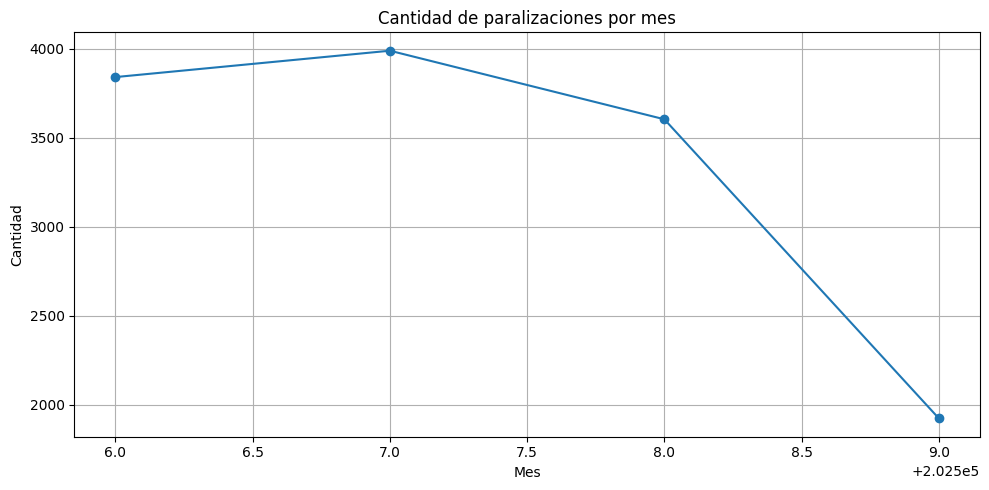

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(cant_pnes_por_mes['periodo'], cant_pnes_por_mes['cantidad'], marker='o')
plt.title('Cantidad de paralizaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()


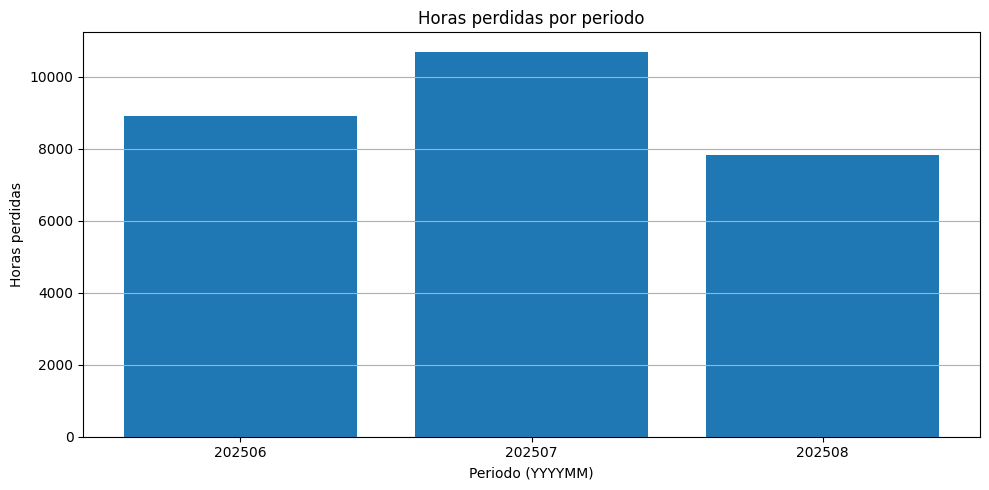

In [42]:
#cantidad de horas perdidas por período

pnes_df['fecha_hora_desde'] = pd.to_datetime(pnes_df['fecha_hora_desde'])
pnes_df['fecha_hora_hasta'] = pd.to_datetime(pnes_df['fecha_hora_hasta'])

# Calcular la duración en horas y llevarlo a formato horas
pnes_df['horas_perdidas'] = (pnes_df['fecha_hora_hasta'] - pnes_df['fecha_hora_desde']).dt.total_seconds() / 3600

# Agrupar por periodo y sumar las horas perdidas
horas_por_periodo = pnes_df.groupby('periodo')['horas_perdidas'].sum().reset_index()
import matplotlib.pyplot as plt

#Grafico
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(horas_por_periodo['periodo'].astype(str), horas_por_periodo['horas_perdidas'])
plt.title('Horas perdidas por periodo')
plt.xlabel('Periodo (YYYYMM)')
plt.ylabel('Horas perdidas')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-316817143.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=causal_horas, x="horas_perdidas", y="desc_causal", palette="viridis")


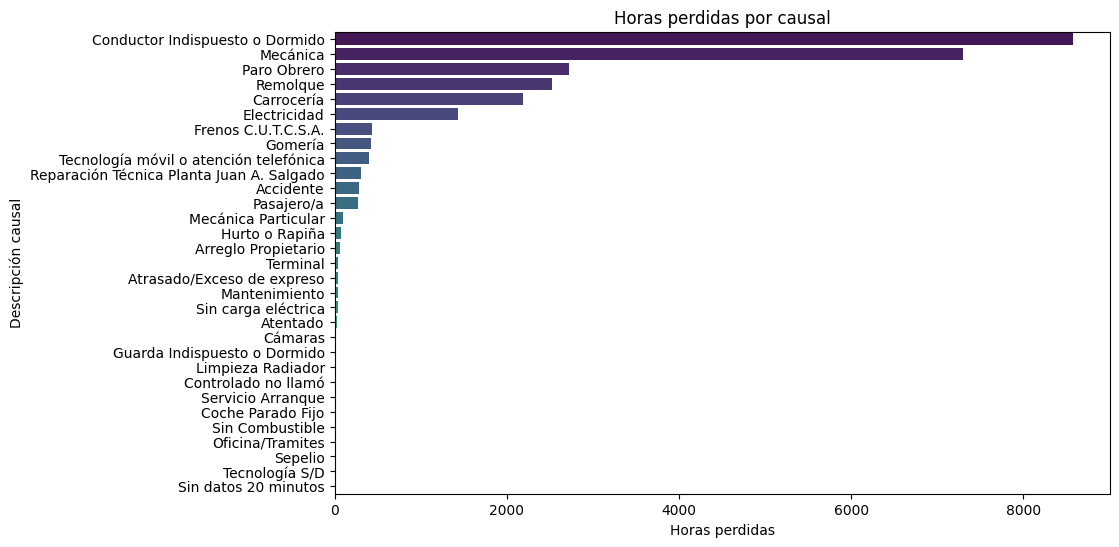

In [49]:
# Agrupar por código de causal y sumar horas
causal_horas = pnes_df.groupby(["cod_causal", "desc_causal"])["horas_perdidas"].sum().reset_index()

# Ordenar descendente
causal_horas = causal_horas.sort_values("horas_perdidas", ascending=False)

# Gráfico de barras con la descripción como etiqueta
plt.figure(figsize=(10,6))
sns.barplot(data=causal_horas, x="horas_perdidas", y="desc_causal", palette="viridis")
plt.title("Horas perdidas por causal")
plt.xlabel("Horas perdidas")
plt.ylabel("Descripción causal")
plt.show()

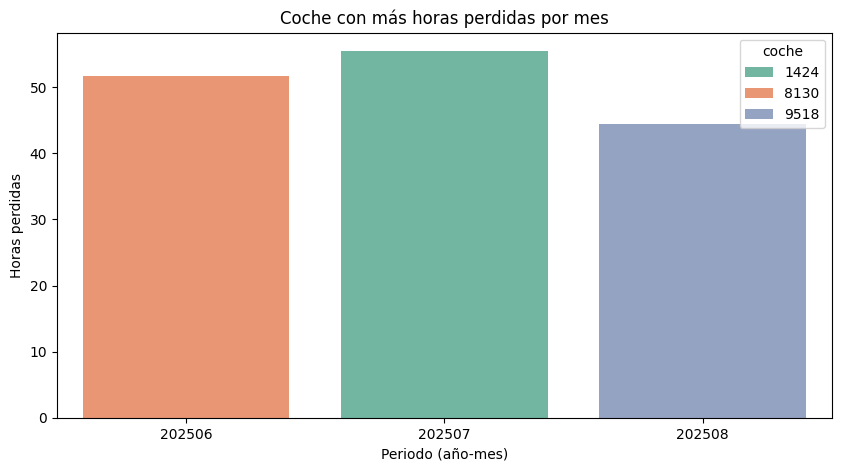

In [50]:
# Agrupar por coche y periodo
coche_horas = pnes_df.groupby(["periodo","coche"])["horas_perdidas"].sum().reset_index()

# Top coche por mes
top_coche = coche_horas.loc[coche_horas.groupby("periodo")["horas_perdidas"].idxmax()]

plt.figure(figsize=(10,5))
sns.barplot(data=top_coche, x="periodo", y="horas_perdidas", hue="coche", palette="Set2")
plt.title("Coche con más horas perdidas por mes")
plt.ylabel("Horas perdidas")
plt.xlabel("Periodo (año-mes)")
plt.show()

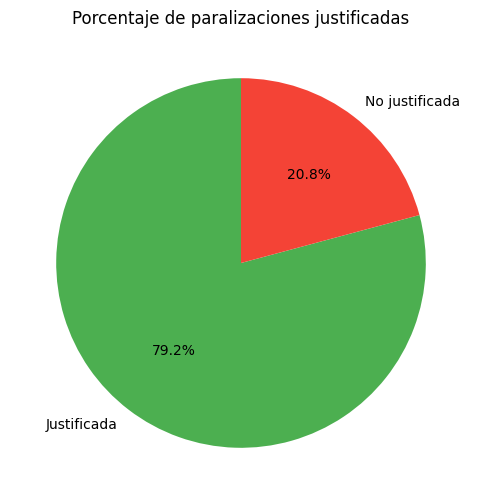

In [60]:
# Crear columna nueva con etiquetas más claras
pnes_df["justificado_desc"] = pnes_df["es_justificada"].map({"t": "Justificada", "f": "No justificada"})

# Calcular porcentaje de cada categoría
justificados = pnes_df["justificado_desc"].value_counts(normalize=True) * 100

# Gráfico de torta (pie chart)
plt.figure(figsize=(6,6))
plt.pie(
    justificados,
    labels=justificados.index,
    autopct="%.1f%%",
    colors=["#4caf50", "#f44336"],
    startangle=90
)
plt.title("Porcentaje de paralizaciones justificadas")
plt.show()

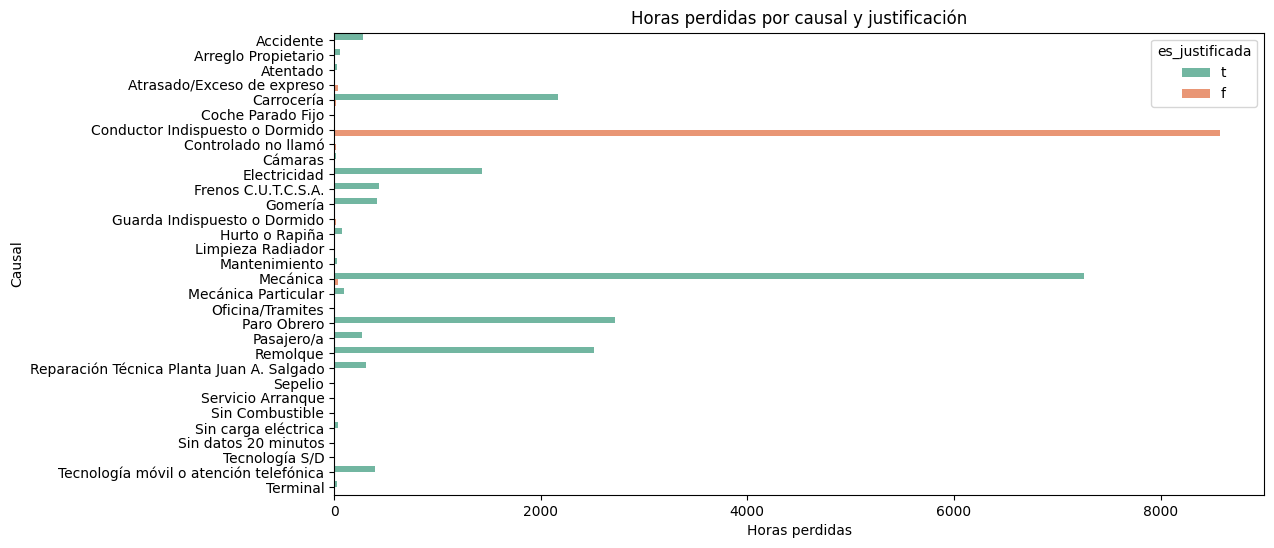

In [61]:
#Horas perdidas por causal y justificacion
import seaborn as sns
import matplotlib.pyplot as plt

causal_just = (
    pnes_df.groupby(["desc_causal", "es_justificada"])["horas_perdidas"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=causal_just,
    x="horas_perdidas",
    y="desc_causal",
    hue="es_justificada",
    palette="Set2"
)
plt.title("Horas perdidas por causal y justificación")
plt.xlabel("Horas perdidas")
plt.ylabel("Causal")
plt.show()


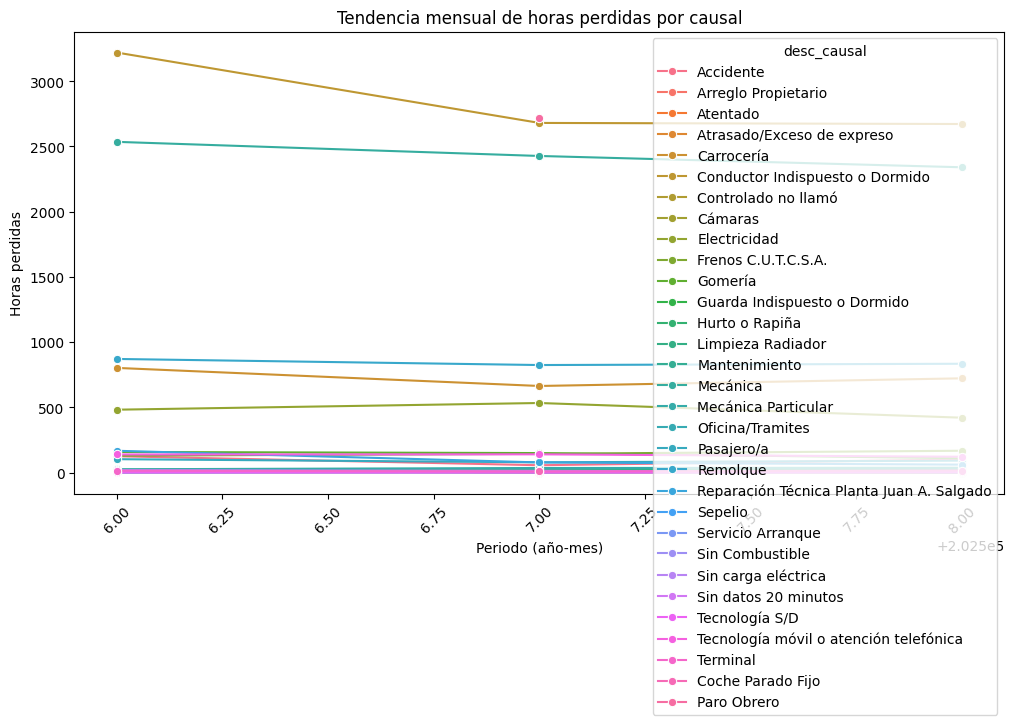

In [63]:
#Tendencia por causal y por mes
causal_mes = (
    pnes_df.groupby(["periodo", "desc_causal"])["horas_perdidas"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=causal_mes, x="periodo", y="horas_perdidas", hue="desc_causal", marker="o"
)
plt.title("Tendencia mensual de horas perdidas por causal")
plt.xlabel("Periodo (año-mes)")
plt.ylabel("Horas perdidas")
plt.xticks(rotation=45)
plt.show()

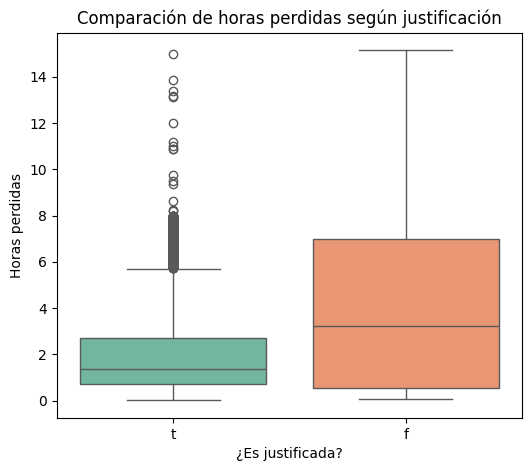

In [68]:
#Horas perdidas y justificacion
plt.figure(figsize=(6,5))
sns.boxplot(
    data=pnes_df,
    x="es_justificada",
    y="horas_perdidas",
    hue="es_justificada",   # <- añadido
    palette="Set2",
    legend=False            # <- para que no repita la leyenda
)
plt.title("Comparación de horas perdidas según justificación")
plt.xlabel("¿Es justificada?")
plt.ylabel("Horas perdidas")
plt.show()



KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ddff7313100> (for post_execute):


KeyboardInterrupt: 

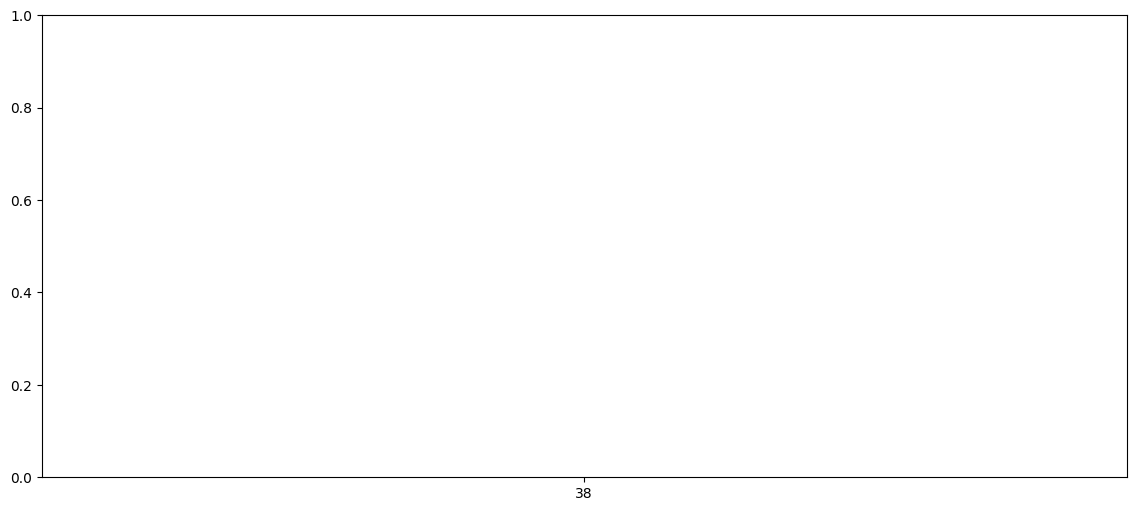

In [69]:
# coche y justificacion
plt.figure(figsize=(14,6))
sns.barplot(
    data=pnes_df,
    x="coche",
    y="horas_perdidas",
    hue="es_justificada",
    estimator=sum,
    palette="Set1"
)
plt.title("Horas perdidas por coche y justificación")
plt.xlabel("Coche")
plt.ylabel("Horas perdidas")
plt.xticks(rotation=90)
plt.show()